**Dataset:** [Raisin](https://archive.ics.uci.edu/dataset/850/raisin)  

**Environment**  
* Windows-native: Version `Windows10-x64-Professional-22H2`

**Framework**  
* TensorFlow: Version `2.10.1`  

**Dependencies**  
* Python: Version `3.9.19`
* Pandas: Version `2.2.2`
* Numpy: Version `1.26.4`

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [13]:
# Load the dataset
df = pd.read_excel('../Datasets/Raisin_Dataset/Raisin_Dataset.xlsx')
df

# 'Class'의 dtype이 object인 것이 확인됨

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [14]:
# 'Class'의 종류를 확인
pd.unique(df['Class']) # Output: Kecimen, Besni

array(['Kecimen', 'Besni'], dtype=object)

In [16]:
# 'Class'를 integer에 matching시켜 dtype을 변경
df['Class'] = df['Class'].map({'Kecimen': 0, 'Besni': 1})
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


In [17]:
# Check the missing value
# 먼저, df 전체에서 missing value가 있는지 확인
if df.isnull().sum().sum() == 0:
    print("no missing values.")
# missing value가 존재한다면, 각 column에서의 수를 리턴
else:
    print(df.isnull().sum())

no missing values.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [19]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636,0.500000
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315,0.500278
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000,0.000000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750,0.000000
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000,0.500000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750,1.000000
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000,1.000000


In [22]:
# Check the columns
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

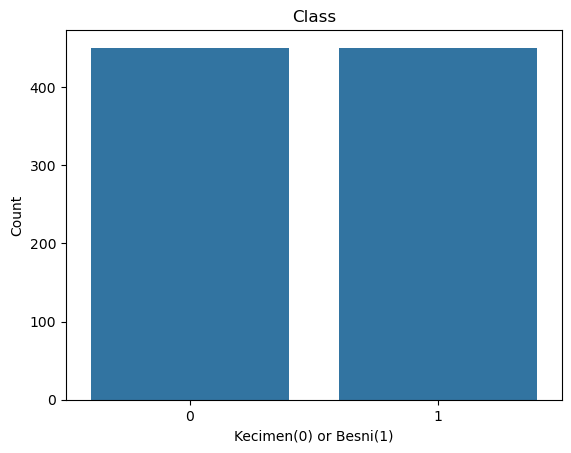

In [23]:
# Check the label count - by graph
sns.countplot(data=df, x='Class')
plt.xlabel('Kecimen(0) or Besni(1)')
plt.ylabel('Count')
plt.title('Class')
plt.show()

In [26]:
# Check the label count - by numeri table
df['Class'].value_counts()

Class
0    450
1    450
Name: count, dtype: int64

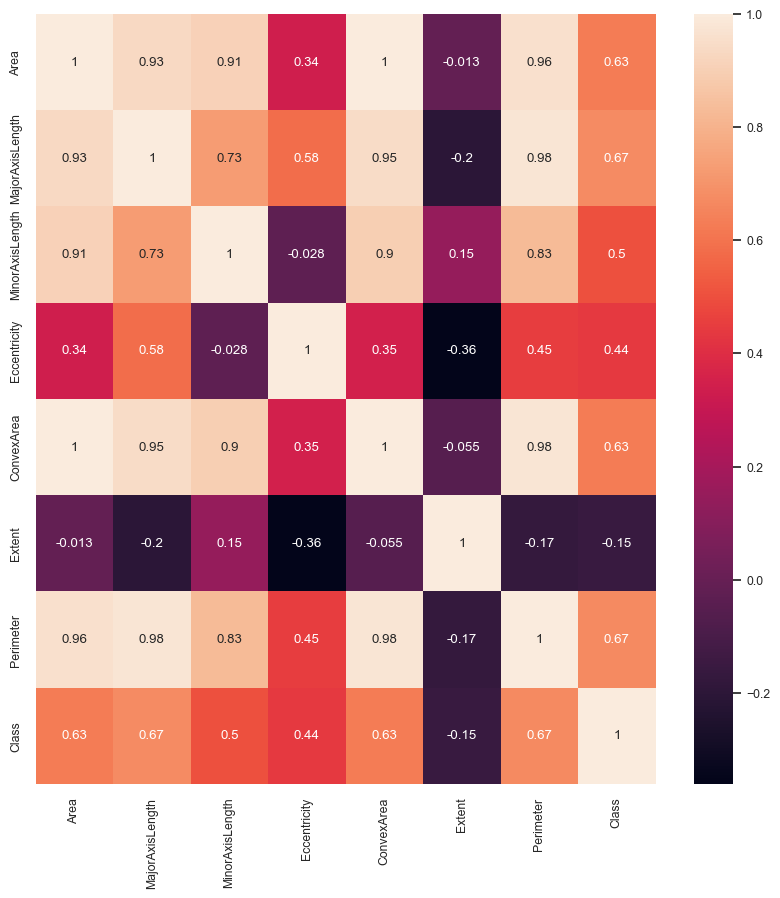

In [28]:
# Check the correlations by `sns.heatmap`
# If corr >= 0.3, positive-correlated and if corr >= 0.7, high correlated
# If corr <= -0.3, negative-correlated and if corr <= -0.7, high correlated
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(data=df_corr, annot=True)
plt.show()

# positive-correlated with 'Class'
# Except for 'Extent', all features have a positive correlation with 'Class'.

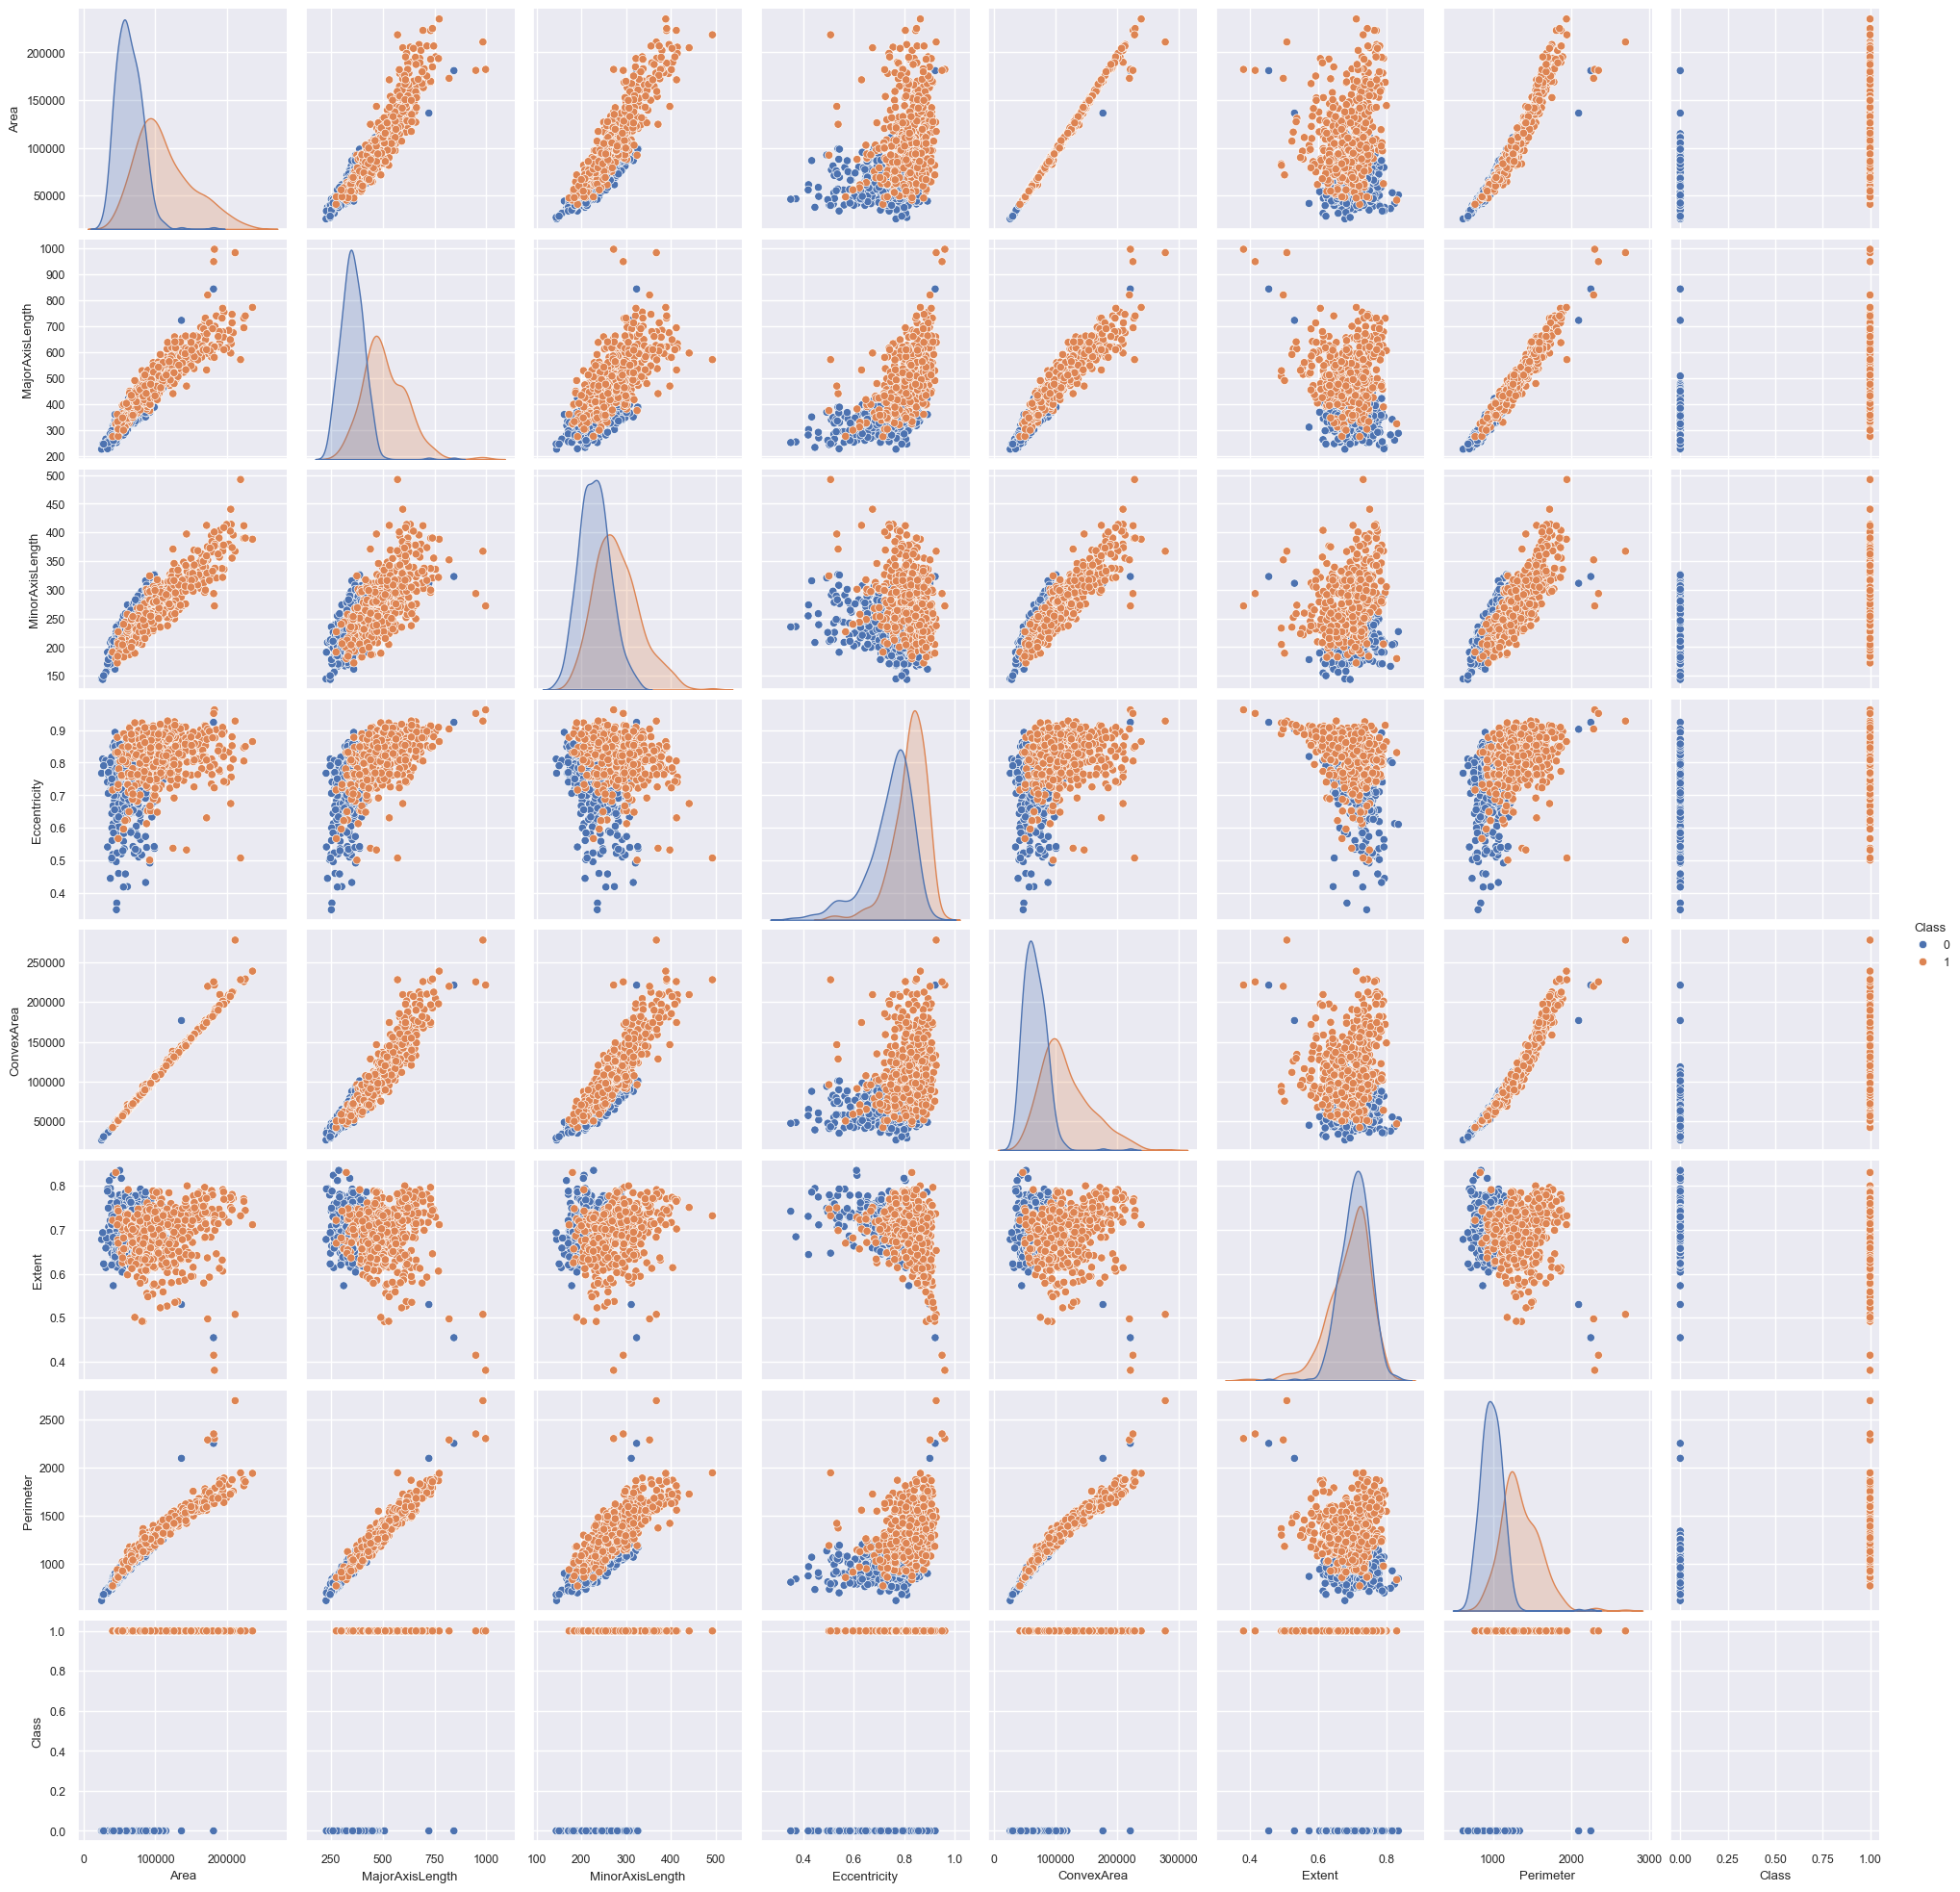

In [30]:
# check the correlations by `sns.pairplot`
sns.pairplot(data=df,
             vars=df.columns,
             hue='Class')
plt.show()

In [31]:
# cf. 해당 색상들이 순서대로 부여됨 즉, blue=>label 0이고 orange=>label 1
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [37]:
# split dataset into X(features) and y(label)
X = df.drop('Class', axis=1).to_numpy()
y = df['Class'].to_numpy()

print(f'X: Shape {X.shape}, y: Shape {y.shape}')
print(X[:3])
print(y[:3])

X: Shape (900, 7), y: Shape (900,)
[[8.75240000e+04 4.42246011e+02 2.53291155e+02 8.19738392e-01
  9.05460000e+04 7.58650579e-01 1.18404000e+03]
 [7.51660000e+04 4.06690687e+02 2.43032436e+02 8.01805234e-01
  7.87890000e+04 6.84129570e-01 1.12178600e+03]
 [9.08560000e+04 4.42267048e+02 2.66328318e+02 7.98353619e-01
  9.37170000e+04 6.37612812e-01 1.20857500e+03]]
[0 0 0]


In [39]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X[:3])

[[-0.00718637  0.09757695 -0.02395819  0.42314164 -0.01570903  1.10674264
   0.06627397]
 [-0.32421719 -0.20901207 -0.22929222  0.22447639 -0.3042482  -0.28777679
  -0.16125245]
 [ 0.07829241  0.09775835  0.23698797  0.18623907  0.06211335 -1.15824974
   0.15594468]]


**cf. [sklearn.preprocessing StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**

In [44]:
# One-hot encoding
def one_hot_encode(labels, num_classes):
    # labels: 클래스 인덱스가 포함된 배열
    # num_classes: 총 클래스의 수
    
    # label을 index로 사용,
    # label에 해당하는 index만 1.이고 나머지는 0.인,
    # 길이가 num_classes인 ndarray 리턴
    one_hot = np.eye(num_classes)[labels]
    
    return one_hot

num_classes = len(np.unique(y)) # np.unique(y) = [0, 1]

y_onehot = one_hot_encode(y, num_classes)
print(y_onehot[:3])

[[1. 0.]
 [1. 0.]
 [1. 0.]]


**cf. [numpy.eye](https://numpy.org/devdocs/reference/generated/numpy.eye.html)**  

기본적으로 `np.eye(N)`는 N by N의 2-dim 단위 행렬(대각선 요소만 1인 행렬)을 리턴함.
```python
np.eye(3)
> array([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]])
```

`np.eye(N)[idx]`와 같이 사용하면 length가 N이고, idx의 element만 1이고, 나머지는 0인 1-dim array를 리턴함.  
```python
np.eye(3)[1]
> array([0., 1., 0.])
```

In [56]:
# Split the X and y_onehot into train, test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot,
                                                    test_size=0.2,
                                                    stratify=y_onehot,
                                                    random_state=42)

print(f'X_train: Shape {X_train.shape}, y_train: Shape {y_train.shape}')
print(f'X_test: Shape {X_test.shape}, y_test: Shape {y_test.shape}')

X_train: Shape (720, 7), y_train: Shape (720, 2)
X_test: Shape (180, 7), y_test: Shape (180, 2)


In [57]:
X_train_reshaped = X_train.reshape((-1, 7, 1))
X_test_reshaped = X_test.reshape((-1, 7, 1))

In [64]:
X_train_reshaped.shape

(720, 7, 1)

In [166]:
model = keras.Sequential()
model.add(keras.layers.Conv1D(filters=32,
                              kernel_size=3,
                              activation='relu',
                              padding='same',
                              # (steps, channels) 
                              input_shape=(7, 1)))
model.add(keras.layers.Conv1D(filters=64,
                               kernel_size=3,
                               activation='relu',
                               padding='same'))
# 기본적으로 Conv1D(2D도 마찬가지)는 channel-dim을 필요로 함.
# 따라서 위 cell에서 features가 7개인 기본 shape에 channel을 추가하여,
# (7,)에서 (7, 1)로 reshape했음.
# Dense로 보내기 위해서는 다시 Flatten이 필요함
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=64,
                             activation='relu'))
model.add(keras.layers.Dense(units=2,
                             activation='sigmoid'))


model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 7, 32)             128       
                                                                 
 conv1d_27 (Conv1D)          (None, 7, 64)             6208      
                                                                 
 flatten_17 (Flatten)        (None, 448)               0         
                                                                 
 dense_42 (Dense)            (None, 64)                28736     
                                                                 
 dense_43 (Dense)            (None, 2)                 130       
                                                                 
Total params: 35,202
Trainable params: 35,202
Non-trainable params: 0
_________________________________________________________________


In [168]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [169]:
history = model.fit(X_train_reshaped, y_train,
                    validation_split=0.1,
                    batch_size=None,
                    epochs=50,
                    verbose=2)

Epoch 1/50
21/21 - 1s - loss: 0.4395 - accuracy: 0.8302 - val_loss: 0.2777 - val_accuracy: 0.8889 - 766ms/epoch - 36ms/step
Epoch 2/50
21/21 - 0s - loss: 0.3482 - accuracy: 0.8596 - val_loss: 0.2505 - val_accuracy: 0.8889 - 161ms/epoch - 8ms/step
Epoch 3/50
21/21 - 0s - loss: 0.3415 - accuracy: 0.8611 - val_loss: 0.2824 - val_accuracy: 0.8750 - 163ms/epoch - 8ms/step
Epoch 4/50
21/21 - 0s - loss: 0.3443 - accuracy: 0.8657 - val_loss: 0.2662 - val_accuracy: 0.8889 - 147ms/epoch - 7ms/step
Epoch 5/50
21/21 - 0s - loss: 0.3431 - accuracy: 0.8627 - val_loss: 0.2785 - val_accuracy: 0.9028 - 150ms/epoch - 7ms/step
Epoch 6/50
21/21 - 0s - loss: 0.3389 - accuracy: 0.8657 - val_loss: 0.2721 - val_accuracy: 0.8750 - 151ms/epoch - 7ms/step
Epoch 7/50
21/21 - 0s - loss: 0.3372 - accuracy: 0.8642 - val_loss: 0.2697 - val_accuracy: 0.8889 - 150ms/epoch - 7ms/step
Epoch 8/50
21/21 - 0s - loss: 0.3341 - accuracy: 0.8627 - val_loss: 0.2637 - val_accuracy: 0.8889 - 143ms/epoch - 7ms/step
Epoch 9/50
21/2

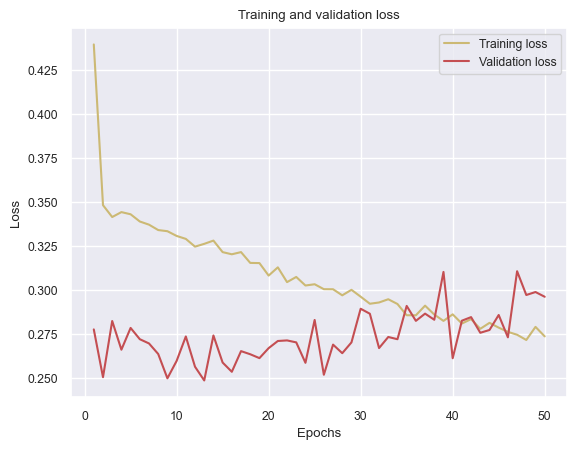

In [170]:
# Epoch에 따른 loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

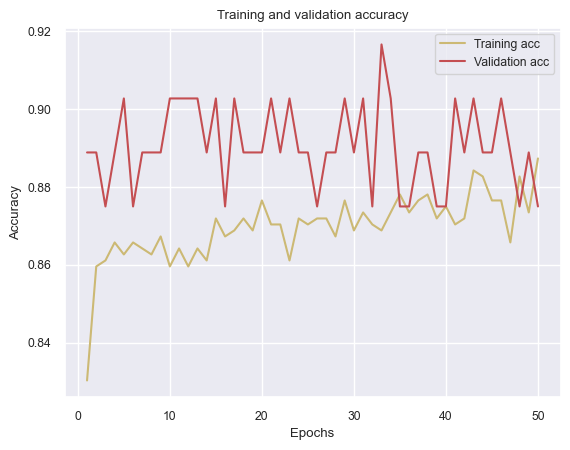

In [171]:
# Epoch에 따른 accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [172]:
# Accuracy of the predicted values
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_reshaped)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        90
           1       0.91      0.83      0.87        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180

[[83  7]
 [15 75]]
